In [1]:
import gensim
from gensim.models import Word2Vec
import json
import gensim.downloader as api
from sklearn.cluster import DBSCAN
from pyclustering.cluster.dbscan import dbscan
import numpy as np

import os
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector

import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA

## Read the sentences list

In [34]:
sentences = []
with open('../../Preprocess_venue/venues_unique.json', 'r') as f:
    sentences = json.loads(f.read())
print(len(sentences))

3643


In [3]:
word_vectors_model = api.load('glove-wiki-gigaword-100')

In [35]:
X = []
wrong_words = 0
total_words = 0
len_lower = 0
for sentence in sentences:
    word_vector = []
    for word in sentence:
        total_words += 1
        print(word)
        try:
            word_vector.append(word_vectors_model[word])
        except:
            wrong_words += 1
    leng = len(word_vector)
    avg_vect = np.zeros(100)    
    if (leng > 1):
        for elem in word_vector:
            for i in range(0,100):
                avg_vect[i] += elem[i]
        
        for i in range(0,100):
            avg_vect[i] /= leng   
#     else:
#         print(len(word_vector[0]))
#         for i in range(0,100):
#             avg_vect[i] += word_vector[0][i]
#         len_lower += 1
    X.append(avg_vect)    

a-statistical
mechanics
applications
abdominal
imaging
abstraction
reformulation
approximation
academic
librarianship
academic
radiology
academy
academy
sciences
academy
sciences-technical
sciences
access
access
control
models
technologies
access
networks
acimed
acm
acm
accessibility
computing
acm
ada
letters
acm
apl
quote
quad
acm
applied
computing
acm
applied
computing
review
acm
architecture
news
acm
communications
algebra
acm
computers
physically
handicapped
acm
computers
society
acm
computing
cultural
heritage
acm
computing
surveys
acm
crossroads
student
acm
documentation
acm
emerging
technologies
computing
systems
acm
experimental
algorithms
acm
fortran
forum
acm
hypertext
acm
joint
digital
libraries
acm
letters
programming
systems
acm
lisp
acm
mobile
computing
networking
acm
multimedia
acm
newsletter
acm
parallel
algorithms
architectures
acm
personnel
acm
principles
practice
parallel
programming
acm
queue
acm
review
acm
sigchi
acm
sigevolution
acm
siggroup
acm
sigir
research
dev

sensing
applied
sciences
applied
soft
computing
applied
statistics
applied
stochastic
models
business
industry
approximate
reasoning
approximation
online
algorithms
approximation
theory
arabian
engineering
arabic
islamic
studies
archaeological
architectural
computing
architectural
support
programming
operating
systems
architecture
architecture
high
performance
computing
architecture
letters
architectures
networking
communications
systems
archive
mathematical
logic
archives
civil
mechanical
engineering
archives
museum
informatics
area
argument
computation
arithmetic
arthritis
research
therapy
articulated
motion
deformable
objects
artist
home
culture
arts
technology
arxiv
arxiv
accelerator
physics
arxiv
adaptation
self-organizing
systems
arxiv
algebraic
geometry
arxiv
algebraic
topology
arxiv
analysis
pdes
arxiv
applications
arxiv
astrophysics
arxiv
astrophysics
galaxies
arxiv
atmospheric
oceanic
physics
arxiv
atomic
physics
arxiv
biological
physics
arxiv
biomolecules
arxiv
category
theo

engineering
research
design
chemical
information
modeling
chemical
information
sciences
chemical
papers
chemical
physics
chemical
theory
computation
cheminform
cheminformatics
chemistry
chemometrics
chemometrics
intelligent
laboratory
systems
child
development
china-mathematics
china-physics
mechanics
astronomy
chromatography
circuit
theory
applications
circuit
theory
design
circuit
world
circuits
communications
systems
circuits
systems
circuits
systems
computers
circuits
systems
signal
processing
classical
quantum
gravity
classification
clei
electronic
clinical
bioinformatics
clinical
gastroenterology
hepatology
clinical
investigative
medicine
clinical
virology
cloud
computing
cloud
computing
services
cloud
computing
technology
cluster
computing
cluster
computing
grid
cmes-computer
modeling
engineering
sciences
cocos
code
generation
optimization
codesign
cognition
cognition
instruction
cognition
technology
work
cognitive
cognitive
computation
cognitive
ergonomics
cognitive
informatics

networks
decision
analysis
decision
control
decision
sciences
decision
support
systems
decision
support
technology
decision
systems
declarative
agent
technologies
defect
fault
tolerance
vlsi
nanotechnology
systems
defense
modeling
simulation
applications
methodology
technology
del
del
lenguaje
natural
deontic
logic
dependable
computing
dependable
systems
networks
dermatological
des
des
sciences
design
design
automation
design
automation
embedded
systems
design
automation
test
design
communication
design
diagnostics
electronic
circuits
systems
design
reliable
communication
networks
design
studies
design
test
computers
designing
interactive
systems
designing
pleasurable
products
interfaces
designing
user
experiences
designs
codes
cryptography
development
development
learning
organizations
developments
language
theory
difference
equations
applications
differential
equations
differential
geometry
differential
geometry
applications
digital
communications
networks
digital
content
technology


formal
methods
models
design
formal
methods
open
object
based
distributed
systems
formal
methods
open
object-based
distributed
systems
formal
modeling
analysis
timed
systems
formal
ontology
information
systems
formal
techniques
networked
and
distributed
systems
formal
techniques
networked
distributed
systems
formalized
mathematics
formalized
reasoning
forum
forum
specification
design
foundations
foundations
computational
intelligence
foundations
computational
mathematics
foundations
digital
games
foundations
genetic
algorithms
foundations
information
knowledge
systems
foundations
physics
foundations
practice
security
foundations
software
computation
structure
foundations
software
engineering
foundations
software
technology
theoretical
foundations
trends
communications
information
theory
foundations
trends
databases
foundations
trends
electronic
design
automation
foundations
trends
graphics
vision
foundations
trends
human-computer
interaction
foundations
trends
information
retrieval
fou

tourism
information
communication
technology
information
communication
technology
education
information
computation
information
decision
sciences
information
economics
policy
information
engineering
information
fusion
information
hiding
information
interaction
context
information
knowledge
management
information
law
technology
information
management
information
management
security
information
modeling
design
information
modelling
knowledge
bases
information
networking
information
organization
information
processing
information
processing
letters
information
processing
management
information
processing
management
uncertainty
information
processing
medical
imaging
information
processing
sensor
networks
information
processing
systems
information
processing
trusted
computing
information
quality
information
research
information
resources
management
information
retrieval
information
retrieval
facility
information
reuse
integration
information
sciences
information
sciences
signal
processing
a

logic
programming
non-monotonic
reasoning
logic-based
program
synthesis
transformation
logical
aspects
computational
linguistics
logical
methods
logiciel
base
données
software
databases
networks
logistics
research
low
power
electronics
low
power
electronics
design
lts
mabs
machine
consciousness
machine
learning
machine
learning
applications
machine
learning
cybernetics
machine
learning
data
mining
pattern
recognition
machine
learning
research
machine
tools
manufacture
machine
translation
machine
vision
machine
vision
applications
machine
vision
human
machine
interface
machines
computations
universality
magnetic
resonance
magnetic
resonance
imaging
magnetic
resonance
materials
physics
biology
medicine
magnetic
resonance
medicine
magnetism
magnetic
materials
malaria
management
management
data
management
decision
management
emergent
digital
ecosystems
management
environmental
quality
management
information
systems
management
information
systems
quarterly
managing
information
technology
ma

networks
pattern
recognition
neural
processing
letters
neural
systems
neurobiology
aging
neurocomputing
neuroimage
neuroinformatics
neurophysiology
neuropsychopharmacology
neuroquantology
neurorehabilitation
neuroscience
neuroscience
methods
neurosurgery
new
astronomy
new
computer-human
interaction
new
generation
computing
new
human
interaction
new
interfaces
musical
expression
new
mathematics
natural
computation
new
media
society
new
music
research
new
physics
new
review
hypermedia
multimedia
new
review
hypermedia
multimedia
hypermedia
new
security
paradigms
new
technologies
mobility
security
new
trends
software
methodologies
tools
techniques
new
york
academy
sciences
news
next-generation
networks
non
linear
speech
processing
non
monotonic
reasoning
non
photorealistic
animation
rendering
non-linear
mechanics
non-linear
speech
processing
non-monotonic
reasoning
non-newtonian
fluid
mechanics
non-photorealistic
animation
rendering
noncommutative
geometry
nonlinear
nonlinear
analysis
hybr

psychonomic
review
public
economic
theory
public
key
cryptography
public
key
infrastructure
public
library
quarterly
public
relations
review
public
transport
public
understanding
publications
astronomical
society
publications
research
institute
mathematical
sciences
publishing
research
quarterly
pure
applied
algebra
pure
applied
logic
quality
databases
quality
electronic
design
quality
information
communications
technology
quality
multimedia
experience
quality
quantity
quality
reliability
engineering
quality
service
quality
software
quality
software
architectures
quantitative
economics
quantitative
evaluation
systems
quantitative
linguistics
quantum
chemistry
quantum
communication
quantum
networking
quantum
information
quantum
information
computation
quantum
information
processing
quarterly
applied
mathematics
quarterly
operations
research
quest
queueing
systems
radio
frequency
identification
technology
applications
radioengineering
radiology
rairo-operations
research
raman
spectroscop

analysis
manipulation
source
code
biology
medicine
southwest
image
analysis
interpretation
space
space
communications
space
structures
space
weather
space
climate
spatial
cognition
computation
spatial
data
mining
geographical
knowledge
services
spatial
information
spatial
information
theory
spatial
vision
spec
performance
evaluation
speech
communication
speech
communication
association
speech
language
speech
technology
spoken
language
processing
spoken
language
technology
spring
spring
graphics
spring
simulation
spring
young
researchers
colloquium
databases
information
systems
springerplus
standardization
innovation
information
technology
standards
interfaces
standards
standardization
research
starting
researchers
static
analysis
statistical
statistical
analysis
data
mining
statistical
association
statistical
computation
simulation
statistical
inference
stochastic
processes
statistical
mechanics
theory
experiment
statistical
methodology
statistical
methods
applications
statistical
pape

services
computing
transactions
signal
processing
transactions
smart
grid
transactions
society
intelligence
transactions
society
mechanical
engineering
transactions
society
mechanical
engineers
transactions
society
simulation
transactions
software
engineering
transactions
speech
audio
processing
transactions
sustainable
energy
transactions
systems
applications
transactions
systems
cybernetics
transactions
systems
man
cybernetics
transactions
telecommunications
transactions
ultrasonics
ferroelectrics
frequency
control
transactions
vehicular
technology
transactions
vision
applications
transactions
visualization
graphics
transactions
wireless
communications
transforming
government
people
process
policy
transfusion
translational
medicine
transportation
transportation
research
b-methodological
transportation
research
c-emerging
technologies
transportation
security
trends
biotechnology
trends
cognitive
sciences
trends
functional
programming
tribology
materials
surfaces
interfaces
trust
manag

In [36]:
print(total_words)
print(len(X))
print(wrong_words)
print(len_lower)

10689
3643
234
0


In [37]:
X = np.array(X)
np.save('X1.npy', X) 

In [20]:
print(X[0:2])

[array([[ 1.0795   ,  0.79005  ,  0.98155  ,  0.22995  , -0.026144 ,
        -0.36496  ,  0.44146  ,  0.26769  ,  0.69364  ,  1.042    ,
         0.57564  ,  0.17308  , -0.95098  ,  0.016868 ,  1.7028   ,
        -0.12299  , -0.28218  , -0.3052   , -0.21085  ,  1.0964   ,
         0.38132  , -0.28961  ,  0.60193  ,  0.74904  ,  0.40335  ,
        -1.2363   ,  0.39752  ,  1.1542   , -0.60508  , -0.50072  ,
         0.39358  , -0.2371   , -0.15332  ,  0.28131  ,  0.23644  ,
         0.12401  ,  0.99359  ,  0.22245  ,  0.012301 ,  0.1213   ,
         0.31891  ,  0.07336  , -0.47031  ,  0.7205   , -0.097753 ,
        -0.0026533,  0.064103 , -0.5825   ,  0.20004  , -1.489    ,
        -0.7564   , -0.32515  ,  0.79485  ,  0.30805  , -0.10913  ,
        -0.9421   , -0.20999  , -0.48523  ,  0.46079  ,  0.75982  ,
         0.77287  , -0.1244   , -1.0568   , -0.55954  , -0.61246  ,
         0.54266  ,  0.072114 ,  0.087356 ,  1.0957   , -0.24699  ,
        -0.2527   ,  0.72024  ,  0.087702 ,  0.

## Apply DBScan

In [38]:
eps = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:
        clustering = DBSCAN(eps=eps[i], min_samples=min_s).fit(X)
        l = []
        cl = clustering.labels_
        min_ones = 0
        for element in cl:
            if element == -1:
                min_ones = min_ones + 1
            else:
                if element not in l:
                    l.append(element)
        print('eps=' + str(eps[i]) + ' min_s=' + str(min_s) + ' nr_clusters=' + str(len(l)) + ' nr_-1=' + str(min_ones))
        min_s = min_s + 1
    i = i + 1

eps=1.0 min_s=1 nr_clusters=3219 nr_-1=0
eps=1.0 min_s=2 nr_clusters=50 nr_-1=3169
eps=1.0 min_s=3 nr_clusters=5 nr_-1=3259
eps=1.0 min_s=4 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=5 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=6 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=7 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=8 nr_clusters=1 nr_-1=3272
eps=1.0 min_s=9 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=1 nr_clusters=3196 nr_-1=0
eps=1.1 min_s=2 nr_clusters=68 nr_-1=3128
eps=1.1 min_s=3 nr_clusters=8 nr_-1=3248
eps=1.1 min_s=4 nr_clusters=2 nr_-1=3266
eps=1.1 min_s=5 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=6 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=7 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=8 nr_clusters=1 nr_-1=3272
eps=1.1 min_s=9 nr_clusters=1 nr_-1=3272
eps=1.2 min_s=1 nr_clusters=3133 nr_-1=0
eps=1.2 min_s=2 nr_clusters=111 nr_-1=3022
eps=1.2 min_s=3 nr_clusters=22 nr_-1=3200
eps=1.2 min_s=4 nr_clusters=4 nr_-1=3258
eps=1.2 min_s=5 nr_clusters=2 nr_-1=3267
eps=1.2 min_s=6 nr_clusters=1 nr_-1=3272
eps=1.2 min

eps=3.2 min_s=4 nr_clusters=1 nr_-1=76
eps=3.2 min_s=5 nr_clusters=1 nr_-1=80
eps=3.2 min_s=6 nr_clusters=1 nr_-1=80
eps=3.2 min_s=7 nr_clusters=1 nr_-1=85
eps=3.2 min_s=8 nr_clusters=1 nr_-1=87
eps=3.2 min_s=9 nr_clusters=1 nr_-1=90
eps=3.3 min_s=1 nr_clusters=49 nr_-1=0
eps=3.3 min_s=2 nr_clusters=3 nr_-1=46
eps=3.3 min_s=3 nr_clusters=1 nr_-1=50
eps=3.3 min_s=4 nr_clusters=1 nr_-1=54
eps=3.3 min_s=5 nr_clusters=1 nr_-1=55
eps=3.3 min_s=6 nr_clusters=1 nr_-1=55
eps=3.3 min_s=7 nr_clusters=1 nr_-1=55
eps=3.3 min_s=8 nr_clusters=1 nr_-1=55
eps=3.3 min_s=9 nr_clusters=1 nr_-1=57
eps=3.4 min_s=1 nr_clusters=36 nr_-1=0
eps=3.4 min_s=2 nr_clusters=3 nr_-1=33
eps=3.4 min_s=3 nr_clusters=1 nr_-1=37
eps=3.4 min_s=4 nr_clusters=1 nr_-1=39
eps=3.4 min_s=5 nr_clusters=1 nr_-1=40
eps=3.4 min_s=6 nr_clusters=1 nr_-1=40
eps=3.4 min_s=7 nr_clusters=1 nr_-1=41
eps=3.4 min_s=8 nr_clusters=1 nr_-1=41
eps=3.4 min_s=9 nr_clusters=1 nr_-1=41
eps=3.5 min_s=1 nr_clusters=29 nr_-1=0
eps=3.5 min_s=2 nr_cluste

KeyboardInterrupt: 

## Test DBScan

In [52]:
clustering = DBSCAN(eps=3.7, min_samples=1).fit(X)
cl = clustering.labels_

# Gaseste numarul de clustere
clust = []
noise = 0

for elem in cl: 
    if elem == -1:
        noise += 1
    else:
        if elem not in clust:
            clust.append(elem)

clustere = np.zeros(len(clust), dtype=np.int64)     
for elem in cl:
    if not ( elem == -1):
        clustere[elem] += 1 
        
print(clustere)

[3629    1    1    1    1    1    1    1    1    1    1    1    1    1
    1]


## Apply DBScan 2

In [53]:
sample = X

eps = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:

        dbscan_instance = dbscan(sample, eps[i], min_s)
        dbscan_instance.process()
        clusters = dbscan_instance.get_clusters()
        noise = dbscan_instance.get_noise()
        print(str(eps[i]) + ' ' + str(min_s) + ' clusters=' + str(len(clusters)) + ' noise=' + str(len(noise)))
        min_s += 1
    
    i += 1


1.0 1 clusters=50 noise=3169
1.0 2 clusters=5 noise=3259
1.0 3 clusters=1 noise=3272
1.0 4 clusters=1 noise=3272
1.0 5 clusters=1 noise=3272
1.0 6 clusters=1 noise=3272
1.0 7 clusters=1 noise=3272
1.0 8 clusters=1 noise=3272
1.0 9 clusters=1 noise=3272
1.1 1 clusters=68 noise=3128
1.1 2 clusters=8 noise=3248
1.1 3 clusters=2 noise=3266
1.1 4 clusters=1 noise=3272
1.1 5 clusters=1 noise=3272
1.1 6 clusters=1 noise=3272
1.1 7 clusters=1 noise=3272
1.1 8 clusters=1 noise=3272
1.1 9 clusters=1 noise=3272
1.2 1 clusters=111 noise=3022
1.2 2 clusters=22 noise=3200
1.2 3 clusters=4 noise=3258
1.2 4 clusters=2 noise=3267
1.2 5 clusters=1 noise=3272
1.2 6 clusters=1 noise=3272
1.2 7 clusters=1 noise=3272
1.2 8 clusters=1 noise=3272
1.2 9 clusters=1 noise=3272
1.3 1 clusters=141 noise=2927
1.3 2 clusters=33 noise=3143
1.3 3 clusters=11 noise=3220
1.3 4 clusters=4 noise=3251
1.3 5 clusters=3 noise=3260
1.3 6 clusters=1 noise=3272
1.3 7 clusters=1 noise=3272
1.3 8 clusters=1 noise=3272
1.3 9 clust

KeyboardInterrupt: 

## Test DBScan 2

In [157]:
dbscan_instance = dbscan(sample, 2.5, 2)
dbscan_instance.process()
clusters = dbscan_instance.get_clusters()
noise = dbscan_instance.get_noise()

clust = np.zeros(len(clusters))
index = 0
for elem in clusters:
    print(index, len(elem))
    index += 1

0 2434
1 5
2 8
3 3
4 3
5 3


## OPTICS Algorithm

In [67]:
from pyclustering.cluster.optics import optics
from pyclustering.cluster import cluster_visualizer

# Read sample for clustering from some file.
sample = X

# Run cluster analysis where connectivity radius is bigger than real.
radius = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
        1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]

i = 0
while i < 100:
    neighbors = 1
    while neighbors < 10:
        optics_instance = optics(sample, radius[i], neighbors)

        # Performs cluster analysis.
        optics_instance.process()

        # Obtain results of clustering.
        clusters = optics_instance.get_clusters()
        noise = optics_instance.get_noise()
        print ( str(radius[i]) + " " + str(neighbors) + " " + str(len(clusters)) + " " + str(len(noise)))
        neighbors += 1
    i += 1

0.1 1 32 3209
0.1 2 2 3269
0.1 3 1 3272
0.1 4 1 3272
0.1 5 1 3272
0.1 6 1 3272
0.1 7 1 3272
0.1 8 1 3272
0.1 9 1 3272
0.2 1 32 3209
0.2 2 2 3269
0.2 3 1 3272
0.2 4 1 3272
0.2 5 1 3272
0.2 6 1 3272
0.2 7 1 3272
0.2 8 1 3272
0.2 9 1 3272
0.3 1 32 3209
0.3 2 2 3269
0.3 3 1 3272
0.3 4 1 3272
0.3 5 1 3272
0.3 6 1 3272
0.3 7 1 3272
0.3 8 1 3272
0.3 9 1 3272
0.4 1 32 3209
0.4 2 2 3269
0.4 3 1 3272
0.4 4 1 3272
0.4 5 1 3272
0.4 6 1 3272
0.4 7 1 3272
0.4 8 1 3272
0.4 9 1 3272
0.5 1 32 3209
0.5 2 2 3269
0.5 3 1 3272
0.5 4 1 3272
0.5 5 1 3272
0.5 6 1 3272
0.5 7 1 3272
0.5 8 1 3272
0.5 9 1 3272
0.6 1 32 3209
0.6 2 2 3269
0.6 3 1 3272
0.6 4 1 3272
0.6 5 1 3272
0.6 6 1 3272
0.6 7 1 3272
0.6 8 1 3272
0.6 9 1 3272
0.7 1 34 3205
0.7 2 2 3269
0.7 3 1 3272
0.7 4 1 3272
0.7 5 1 3272
0.7 6 1 3272
0.7 7 1 3272
0.7 8 1 3272
0.7 9 1 3272
0.8 1 36 3201
0.8 2 2 3269
0.8 3 1 3272
0.8 4 1 3272
0.8 5 1 3272
0.8 6 1 3272
0.8 7 1 3272
0.8 8 1 3272
0.8 9 1 3272
0.9 1 41 3190
0.9 2 3 3267
0.9 3 1 3272
0.9 4 1 3272
0.9

KeyboardInterrupt: 

## Test OPTICS

In [77]:
optics_instance = optics(sample, 2.9, 1)
#2.5 1
#2.5 2
#2.6 1
#2.7 1
#2.8 1
#2.9 1 

# Performs cluster analysis.
optics_instance.process()

# Obtain results of clustering.
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()

print(len(clusters))
print(len(noise))
l_clusters = []
for elem in clusters:
    l_clusters.append(len(elem))
print(l_clusters)

13
176
[3440, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## Apply Hierarchical Clustering

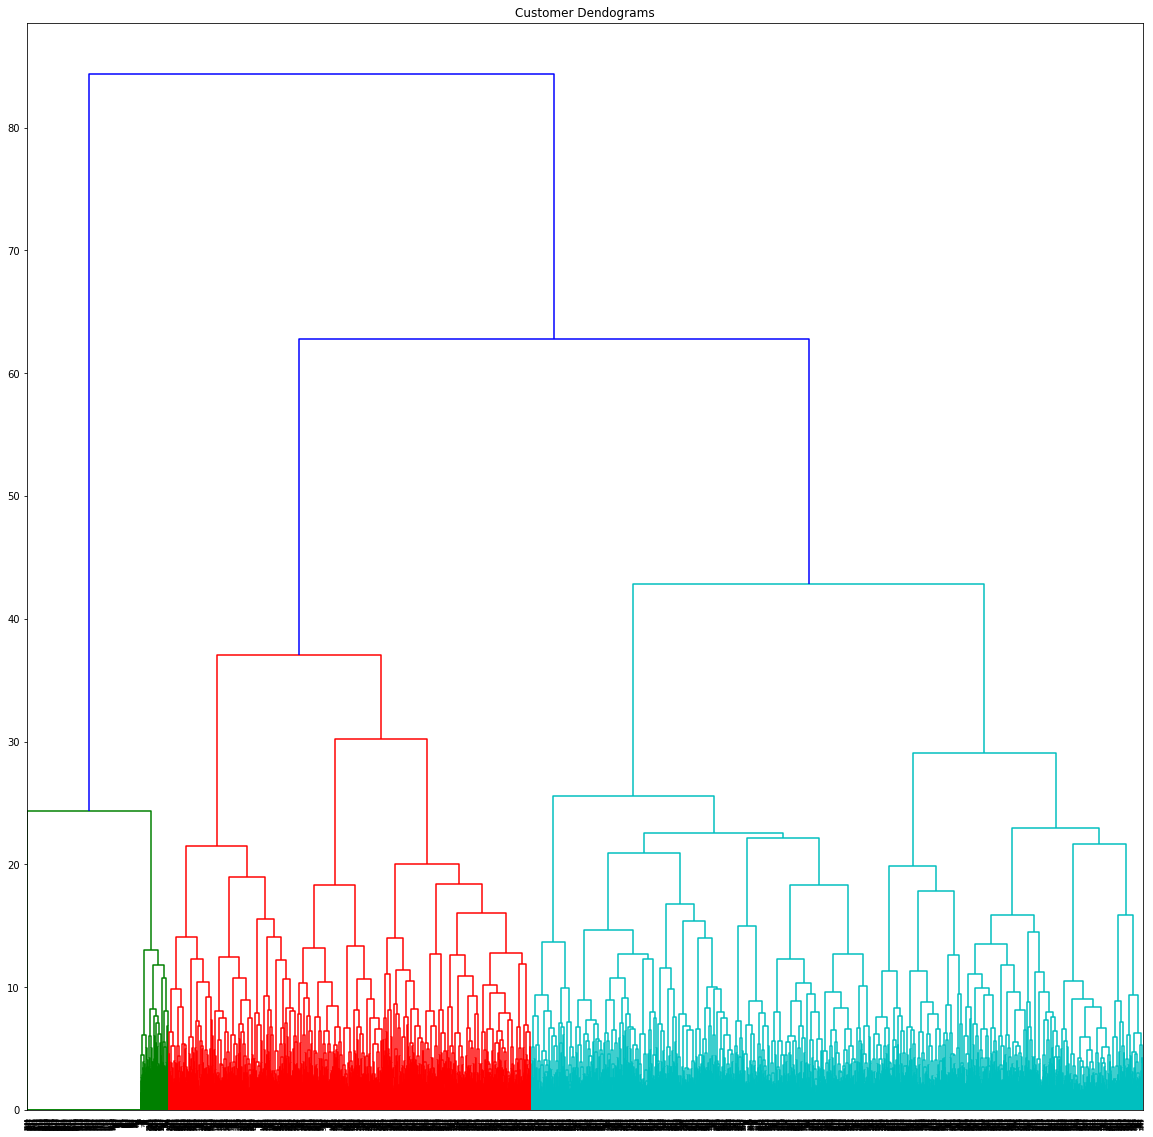

In [82]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt 
data = X
plt.figure(figsize=(20, 20))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

## Pentru Tensorboard

In [169]:
pca = sklearnPCA(n_components=50) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X[0:1000]))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

In [171]:
PATH = os.getcwd()

LOG_DIR = PATH + './log-1'

#metadata = os.path.join(LOG_DIR, 'cl.tsv')

tf_data = tf.Variable(df_pca)

with tf.Session() as sess:
    saver = tf.train.Saver([tf_data])
    sess.run(tf.global_variables_initializer())
    saver.save(sess, os.path.join(LOG_DIR, 'tf_data.ckpt'))
    config = projector.ProjectorConfig()
    
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_data.name
    
    #embedding.metadata_path = metadata
    
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)